In [1]:
import numpy as np

# --- 1. Activation Functions and their Derivatives ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [2]:
# --- 2. Neural Network Class ---
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Store network architecture and learning rate
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases randomly (small values for stability)
        # Weights from input to hidden layer (W1)
        # Dimensions: (input_size, hidden_size)

        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01

        # Biases for hidden layer (b1)
        # Dimensions: (1, hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))

        # Weights from hidden to output layer (W2)
        # Dimensions: (hidden_size, output_size)

        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        # Biases for output layer (b2)
        # Dimensions: (1, output_size)
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        """
        Performs the forward pass through the network.
        Stores intermediate values needed for backpropagation.
        """
        # Layer 1 (Hidden Layer)
        # Z1: Weighted sum of inputs + bias for hidden layer
        # Dimensions: (num_samples, hidden_size)

        self.Z1 = np.dot(X, self.W1) + self.b1
        # A1: Activation of hidden layer
        # Dimensions: (num_samples, hidden_size)
        self.A1 = sigmoid(self.Z1)

        # Layer 2 (Output Layer)
        # Z2: Weighted sum of hidden layer outputs + bias for output layer
        # Dimensions: (num_samples, output_size)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        # A2: Activation of output layer (network's prediction)
        # Dimensions: (num_samples, output_size)
        self.A2 = sigmoid(self.Z2) # Use sigmoid for output for probabilities

        return self.A2

    def backward(self, X, y, output):
        """
        Performs the backward pass (backpropagation) to calculate and apply gradients.
        """
        # ----------------------------------------------------------------------
        # Step 1: Calculate the error at the output layer (dLoss/dA2)
        # ----------------------------------------------------------------------
        # Loss function: Mean Squared Error (MSE) = 0.5 * (y_pred - y_true)^2
        # dLoss/dA2 = derivative of MSE with respect to A2 (output)
        # = (A2 - y)  (we use (output - y) as the base error signal)
        # Dimensions: (num_samples, output_size)
        d_A2 = output - y
        print(f"\n--- BACKPROPAGATION START ---")
        print(f"1. Initial Error (dLoss/dA2):\n{np.round(d_A2, 4)}")

        # ----------------------------------------------------------------------
        # Step 2: Calculate gradients for W2 and b2 (Output Layer)
        # We need dLoss/dZ2, then use it to find dLoss/dW2 and dLoss/db2
        # ----------------------------------------------------------------------

        # dLoss/dZ2 = dLoss/dA2 * dA2/dZ2 (Applying chain rule for output activation)
        # dA2/dZ2 is the derivative of the sigmoid activation function applied to Z2.
        # Dimensions: (num_samples, output_size)

        d_Z2 = d_A2 * sigmoid_derivative(self.Z2)
        print(f"\n2. Error propagated through Output Activation (dLoss/dZ2):\n{np.round(d_Z2, 4)}")

        # dLoss/dW2 = dLoss/dZ2 * dZ2/dW2 (Applying chain rule for W2)
        # dZ2/dW2 is A1.T (from Z2 = A1 * W2 + b2)
        # Dimensions: (hidden_size, num_samples) @ (num_samples, output_size) = (hidden_size, output_size)

        dW2 = np.dot(self.A1.T, d_Z2)
        print(f"\n3. Gradient for Output Layer Weights (dW2):\n{np.round(dW2, 4)}")

        # dLoss/db2 = dLoss/dZ2 * dZ2/db2 (Applying chain rule for b2)
        # dZ2/db2 is just 1 (from Z2 = A1 * W2 + b2)
        # Summing across samples (axis=0) to get gradient for each bias term.
        # Dimensions: (1, output_size)

        db2 = np.sum(d_Z2, axis=0, keepdims=True)
        print(f"\n4. Gradient for Output Layer Biases (db2):\n{np.round(db2, 4)}")

        # ----------------------------------------------------------------------
        # Step 3: Propagate error back to Hidden Layer (dLoss/dA1)
        # We need dLoss/dA1 to then find dLoss/dZ1, dLoss/dW1, dLoss/db1
        # ----------------------------------------------------------------------

        # dLoss/dA1 = dLoss/dZ2 * dZ2/dA1 (Applying chain rule from output layer back to hidden layer's activation)
        # dZ2/dA1 is W2.T (from Z2 = A1 * W2 + b2)
        # Dimensions: (num_samples, output_size) @ (output_size, hidden_size) = (num_samples, hidden_size)

        d_A1 = np.dot(d_Z2, self.W2.T)
        print(f"\n5. Error propagated back to Hidden Layer Activation (dLoss/dA1):\n{np.round(d_A1, 4)}")

        # ----------------------------------------------------------------------
        # Step 4: Calculate gradients for W1 and b1 (Hidden Layer)
        # ----------------------------------------------------------------------

        # dLoss/dZ1 = dLoss/dA1 * dA1/dZ1 (Applying chain rule for hidden activation)
        # dA1/dZ1 is the derivative of the sigmoid activation function applied to Z1.
        # Dimensions: (num_samples, hidden_size)

        d_Z1 = d_A1 * sigmoid_derivative(self.Z1)
        print(f"\n6. Error propagated through Hidden Activation (dLoss/dZ1):\n{np.round(d_Z1, 4)}")

        # dLoss/dW1 = dLoss/dZ1 * dZ1/dW1 (Applying chain rule for W1)
        # dZ1/dW1 is X.T (from Z1 = X * W1 + b1)
        # Dimensions: (input_size, num_samples) @ (num_samples, hidden_size) = (input_size, hidden_size)
        dW1 = np.dot(X.T, d_Z1)
        print(f"\n7. Gradient for Hidden Layer Weights (dW1):\n{np.round(dW1, 4)}")

        # dLoss/db1 = dLoss/dZ1 * dZ1/db1 (Applying chain rule for b1)
        # dZ1/db1 is just 1
        # Summing across samples (axis=0) for bias terms.
        # Dimensions: (1, hidden_size)
        db1 = np.sum(d_Z1, axis=0, keepdims=True)
        print(f"\n8. Gradient for Hidden Layer Biases (db1):\n{np.round(db1, 4)}")

        # ----------------------------------------------------------------------
        # Step 5: Update Weights and Biases
        # ----------------------------------------------------------------------
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        print(f"\n--- WEIGHTS & BIASES UPDATED ---")


    def train(self, X, y, epochs, verbose_backprop_at_epoch=None):
        """
        Trains the neural network using the provided data.
        verbose_backprop_at_epoch: If not None, prints detailed backprop steps at this epoch.
        """
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass (calculate and apply gradients)
            # Only print verbose backprop if the current epoch matches
            if verbose_backprop_at_epoch is not None and epoch == verbose_backprop_at_epoch:
                self.backward(X, y, output)
            else:
                # Normal backward pass without extra print statements
                d_A2 = output - y
                d_Z2 = d_A2 * sigmoid_derivative(self.Z2)
                dW2 = np.dot(self.A1.T, d_Z2)
                db2 = np.sum(d_Z2, axis=0, keepdims=True)
                d_A1 = np.dot(d_Z2, self.W2.T)
                d_Z1 = d_A1 * sigmoid_derivative(self.Z1)
                dW1 = np.dot(X.T, d_Z1)
                db1 = np.sum(d_Z1, axis=0, keepdims=True)
                self.W1 -= self.learning_rate * dW1
                self.b1 -= self.learning_rate * db1
                self.W2 -= self.learning_rate * dW2
                self.b2 -= self.learning_rate * db2


            # Calculate and print loss
            loss = np.mean(np.square(y - output)) # Mean Squared Error (MSE)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Makes predictions on new data.
        """
        return self.forward(X)

In [3]:
# --- 3. Example Usage (XOR Problem) ---

if __name__ == "__main__":
    # Input data for XOR (4 samples, 2 features)
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    # True labels for XOR (4 samples, 1 output)
    y = np.array([[0],
                  [1],
                  [1],
                  [0]])

    # Create the neural network
    # input_size=2, hidden_size=4, output_size=1
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.5)

    print("--- Initial Predictions (before training) ---")
    initial_predictions = nn.predict(X)
    print(np.round(initial_predictions, 2))
    print(f"Initial Loss: {np.mean(np.square(y - initial_predictions)):.4f}")

    # Train the network, showing detailed backprop at epoch 0
    print("\n--- Training the Network (showing backprop details at Epoch 0) ---")
    # Set verbose_backprop_at_epoch to 0 to see the step-by-step backprop for the first iteration
    nn.train(X, y, epochs=10000, verbose_backprop_at_epoch=0)

    print("\n--- Final Predictions (after training) ---")
    final_predictions = nn.predict(X)
    print(np.round(final_predictions, 2))
    print(f"Final Loss: {np.mean(np.square(y - final_predictions)):.4f}")

    # Test with new data (which is the same as training data for XOR example)
    print("\n--- Testing with XOR inputs ---")
    test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    test_outputs = nn.predict(test_inputs)
    print(f"Input {test_inputs[0]} -> Predicted: {np.round(test_outputs[0], 2)}")
    print(f"Input {test_inputs[1]} -> Predicted: {np.round(test_outputs[1], 2)}")
    print(f"Input {test_inputs[2]} -> Predicted: {np.round(test_outputs[2], 2)}")
    print(f"Input {test_inputs[3]} -> Predicted: {np.round(test_outputs[3], 2)}")

--- Initial Predictions (before training) ---
[[0.5]
 [0.5]
 [0.5]
 [0.5]]
Initial Loss: 0.2500

--- Training the Network (showing backprop details at Epoch 0) ---

--- BACKPROPAGATION START ---
1. Initial Error (dLoss/dA2):
[[ 0.4996]
 [-0.5004]
 [-0.5004]
 [ 0.4996]]

2. Error propagated through Output Activation (dLoss/dZ2):
[[ 0.1249]
 [-0.1251]
 [-0.1251]
 [ 0.1249]]

3. Gradient for Output Layer Weights (dW2):
[[-0.0002]
 [-0.0002]
 [-0.0002]
 [-0.0002]]

4. Gradient for Output Layer Biases (db2):
[[-0.0004]]

5. Error propagated back to Hidden Layer Activation (dLoss/dA1):
[[-0.0008 -0.0002 -0.0003  0.001 ]
 [ 0.0008  0.0002  0.0003 -0.001 ]
 [ 0.0008  0.0002  0.0003 -0.001 ]
 [-0.0008 -0.0002 -0.0003  0.001 ]]

6. Error propagated through Hidden Activation (dLoss/dZ1):
[[-0.0002 -0.0001 -0.0001  0.0002]
 [ 0.0002  0.0001  0.0001 -0.0002]
 [ 0.0002  0.0001  0.0001 -0.0002]
 [-0.0002 -0.0001 -0.0001  0.0002]]

7. Gradient for Hidden Layer Weights (dW1):
[[ 0.  0.  0. -0.]
 [ 0.  

Optimizers are algorithms used to update the weights and biases of a neural network during training, aiming to minimize the loss function. They determine how the network learns from the computed gradients. Different optimizers use different strategies to adjust these parameters, affecting convergence speed, stability, and the ability to escape local minima or saddle points.

Here's a Python example demonstrating some popular optimizer functions:

Stochastic Gradient Descent (SGD): The simplest optimizer, it updates parameters in the direction opposite to the gradient.
SGD with Momentum: Introduces a "velocity" term that accumulates past gradients, helping to accelerate convergence and smooth out oscillations.
Adagrad: An adaptive learning rate optimizer that scales learning rates inversely proportional to the square root of the sum of past squared gradients. It's good for sparse data but can cause learning rates to decay too aggressively.
RMSprop: An improvement over Adagrad, it uses an exponentially decaying average of past squared gradients, preventing the learning rate from diminishing too quickly.
Adam: (Adaptive Moment Estimation) Combines the ideas of Momentum and RMSprop, using exponentially decaying averages of both past gradients (first moment) and past squared gradients (second moment).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1. Data Generation ---
np.random.seed(42)
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features for better neural network performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y for neural network (N, 1)
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

print(f"Training data shape: {X_train_scaled.shape}, {y_train_reshaped.shape}")
print(f"Test data shape: {X_test_scaled.shape}, {y_test_reshaped.shape}")

Training data shape: (140, 2), (140, 1)
Test data shape: (60, 2), (60, 1)


In [5]:
# --- 2. Neural Network Building Blocks ---

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500))) # Clip to prevent overflow

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def binary_cross_entropy(y_pred, y_true):
    # Clip predictions to prevent log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_derivative(y_pred, y_true):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) # Clip for derivative stability
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

In [7]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        # He initialization for ReLU hidden layer
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        # Glorot/Xavier initialization for Sigmoid output layer
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / (hidden_size + output_size))
        self.b2 = np.zeros((1, output_size))

        # Store activations for backward pass
        self.Z1 = None
        self.A1 = None
        self.Z2 = None
        self.A2 = None # Output prediction

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1) # Hidden layer activation

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2) # Output layer activation (for binary classification)
        return self.A2

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]

        # Output layer gradients
        d_loss_d_A2 = binary_cross_entropy_derivative(y_pred, y_true)
        d_A2_d_Z2 = sigmoid_derivative(self.Z2)
        d_Z2 = d_loss_d_A2 * d_A2_d_Z2

        dW2 = np.dot(self.A1.T, d_Z2) / m
        db2 = np.sum(d_Z2, axis=0, keepdims=True) / m

        # Hidden layer gradients
        d_A1 = np.dot(d_Z2, self.W2.T)
        d_Z1 = d_A1 * relu_derivative(self.Z1)

        dW1 = np.dot(X.T, d_Z1) / m
        db1 = np.sum(d_Z1, axis=0, keepdims=True) / m

        return [dW1, db1, dW2, db2]

    def get_params(self):
        return [self.W1, self.b1, self.W2, self.b2]

    def set_params(self, params):
        self.W1, self.b1, self.W2, self.b2 = params


class Optimizer:
    def __init__(self, params, learning_rate):
        self.params = params # List of numpy arrays (weights and biases)
        self.learning_rate = learning_rate
        self.name = "Optimizer"
        self._state = {} # To store optimizer-specific state (e.g., velocities, moments)
        self._initialize_state()

    def _initialize_state(self):
        # Override in subclasses if state is needed
        pass

    def step(self, gradients):
        # gradients is a list of numpy arrays corresponding to self.params
        for i, (param, grad) in enumerate(zip(self.params, gradients)):
            self.params[i] = self._apply_update(param, grad, i)

    def _apply_update(self, param, grad, index):
        raise NotImplementedError

class SGD(Optimizer):
    def __init__(self, params, learning_rate=0.01):
        super().__init__(params, learning_rate)
        self.name = "SGD"

    def _apply_update(self, param, grad, index):
        return param - self.learning_rate * grad

class SGDMomentum(Optimizer):
    def __init__(self, params, learning_rate=0.01, momentum=0.9):
        super().__init__(params, learning_rate)
        self.momentum = momentum
        self.name = f"SGD + Momentum (β={momentum})"

    def _initialize_state(self):
        self._state['velocities'] = [np.zeros_like(p) for p in self.params]

    def _apply_update(self, param, grad, index):
        velocity = self._state['velocities'][index]
        velocity = self.momentum * velocity + grad
        self._state['velocities'][index] = velocity # Update state
        return param - self.learning_rate * velocity

class Adagrad(Optimizer):
    def __init__(self, params, learning_rate=0.01, epsilon=1e-8):
        super().__init__(params, learning_rate)
        self.epsilon = epsilon
        self.name = f"Adagrad (ϵ={epsilon})"

    def _initialize_state(self):
        self._state['squared_grad_sum'] = [np.zeros_like(p) for p in self.params]

    def _apply_update(self, param, grad, index):
        sgs = self._state['squared_grad_sum'][index]
        sgs += grad**2
        self._state['squared_grad_sum'][index] = sgs # Update state
        return param - self.learning_rate * grad / (np.sqrt(sgs) + self.epsilon)

class RMSprop(Optimizer):
    def __init__(self, params, learning_rate=0.001, decay_rate=0.9, epsilon=1e-8):
        super().__init__(params, learning_rate)
        self.decay_rate = decay_rate
        self.epsilon = epsilon
        self.name = f"RMSprop (ρ={decay_rate})"

    def _initialize_state(self):
        self._state['squared_grad_exp_avg'] = [np.zeros_like(p) for p in self.params]

    def _apply_update(self, param, grad, index):
        sgea = self._state['squared_grad_exp_avg'][index]
        sgea = self.decay_rate * sgea + (1 - self.decay_rate) * (grad**2)
        self._state['squared_grad_exp_avg'][index] = sgea # Update state
        return param - self.learning_rate * grad / (np.sqrt(sgea) + self.epsilon)

class Adam(Optimizer):
    def __init__(self, params, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        super().__init__(params, learning_rate)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0 # Timestep for bias correction
        self.name = f"Adam (β1={beta1}, β2={beta2})"

    def _initialize_state(self):
        self._state['m'] = [np.zeros_like(p) for p in self.params] # First moment estimates
        self._state['v'] = [np.zeros_like(p) for p in self.params] # Second moment estimates

    def _apply_update(self, param, grad, index):
        self.t += 1 # Increment timestep for this parameter update
        m_t = self._state['m'][index]
        v_t = self._state['v'][index]

        m_t = self.beta1 * m_t + (1 - self.beta1) * grad
        v_t = self.beta2 * v_t + (1 - self.beta2) * (grad**2)

        self._state['m'][index] = m_t
        self._state['v'][index] = v_t

        m_hat = m_t / (1 - self.beta1**self.t)
        v_hat = v_t / (1 - self.beta2**self.t)

        return param - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

In [9]:
# --- 5. Training Loop and Comparison ---

def train_and_evaluate(optimizer_instance, model, X_train, y_train, X_test, y_test, epochs=1000, batch_size=32):
    train_losses = []
    test_losses = []

    num_batches = int(np.ceil(X_train.shape[0] / batch_size))

    for epoch in range(epochs):
        # Shuffle data for SGD
        permutation = np.random.permutation(X_train.shape[0])
        X_shuffled = X_train[permutation]
        y_shuffled = y_train[permutation]

        epoch_train_loss = 0
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, X_train.shape[0])
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]

            # Forward pass
            y_pred = model.forward(X_batch)
            loss = binary_cross_entropy(y_pred, y_batch)
            epoch_train_loss += loss

            # Backward pass (compute gradients)
            gradients = model.backward(X_batch, y_batch, y_pred)

            # Optimizer step (update parameters)
            optimizer_instance.step(gradients)

        avg_epoch_train_loss = epoch_train_loss / num_batches
        train_losses.append(avg_epoch_train_loss)

        # Evaluate on test set
        y_test_pred = model.forward(X_test)
        test_loss = binary_cross_entropy(y_test_pred, y_test)
        test_losses.append(test_loss)

        if epoch % (epochs // 10) == 0:
            print(f"  Epoch {epoch:4d} | Train Loss: {avg_epoch_train_loss:.4f} | Test Loss: {test_loss:.4f}")

    # Final evaluation
    test_accuracy = np.mean((model.forward(X_test) > 0.5) == y_test)
    print(f"  Final Test Accuracy: {test_accuracy:.4f}")
    return train_losses, test_losses, model


--- Training with SGD ---
  Epoch    0 | Train Loss: 2.2474 | Test Loss: 2.6311
  Epoch  100 | Train Loss: 2.2956 | Test Loss: 2.6311
  Epoch  200 | Train Loss: 2.2176 | Test Loss: 2.6311
  Epoch  300 | Train Loss: 2.2892 | Test Loss: 2.6311
  Epoch  400 | Train Loss: 2.2543 | Test Loss: 2.6311
  Epoch  500 | Train Loss: 2.3138 | Test Loss: 2.6311
  Epoch  600 | Train Loss: 2.2727 | Test Loss: 2.6311
  Epoch  700 | Train Loss: 2.2838 | Test Loss: 2.6311
  Epoch  800 | Train Loss: 2.2732 | Test Loss: 2.6311
  Epoch  900 | Train Loss: 2.2658 | Test Loss: 2.6311
  Final Test Accuracy: 0.1500

--- Training with Momentum ---
  Epoch    0 | Train Loss: 0.6050 | Test Loss: 0.6380
  Epoch  100 | Train Loss: 0.6136 | Test Loss: 0.6380
  Epoch  200 | Train Loss: 0.6044 | Test Loss: 0.6380
  Epoch  300 | Train Loss: 0.6036 | Test Loss: 0.6380
  Epoch  400 | Train Loss: 0.6059 | Test Loss: 0.6380
  Epoch  500 | Train Loss: 0.5957 | Test Loss: 0.6380
  Epoch  600 | Train Loss: 0.6033 | Test Loss: 

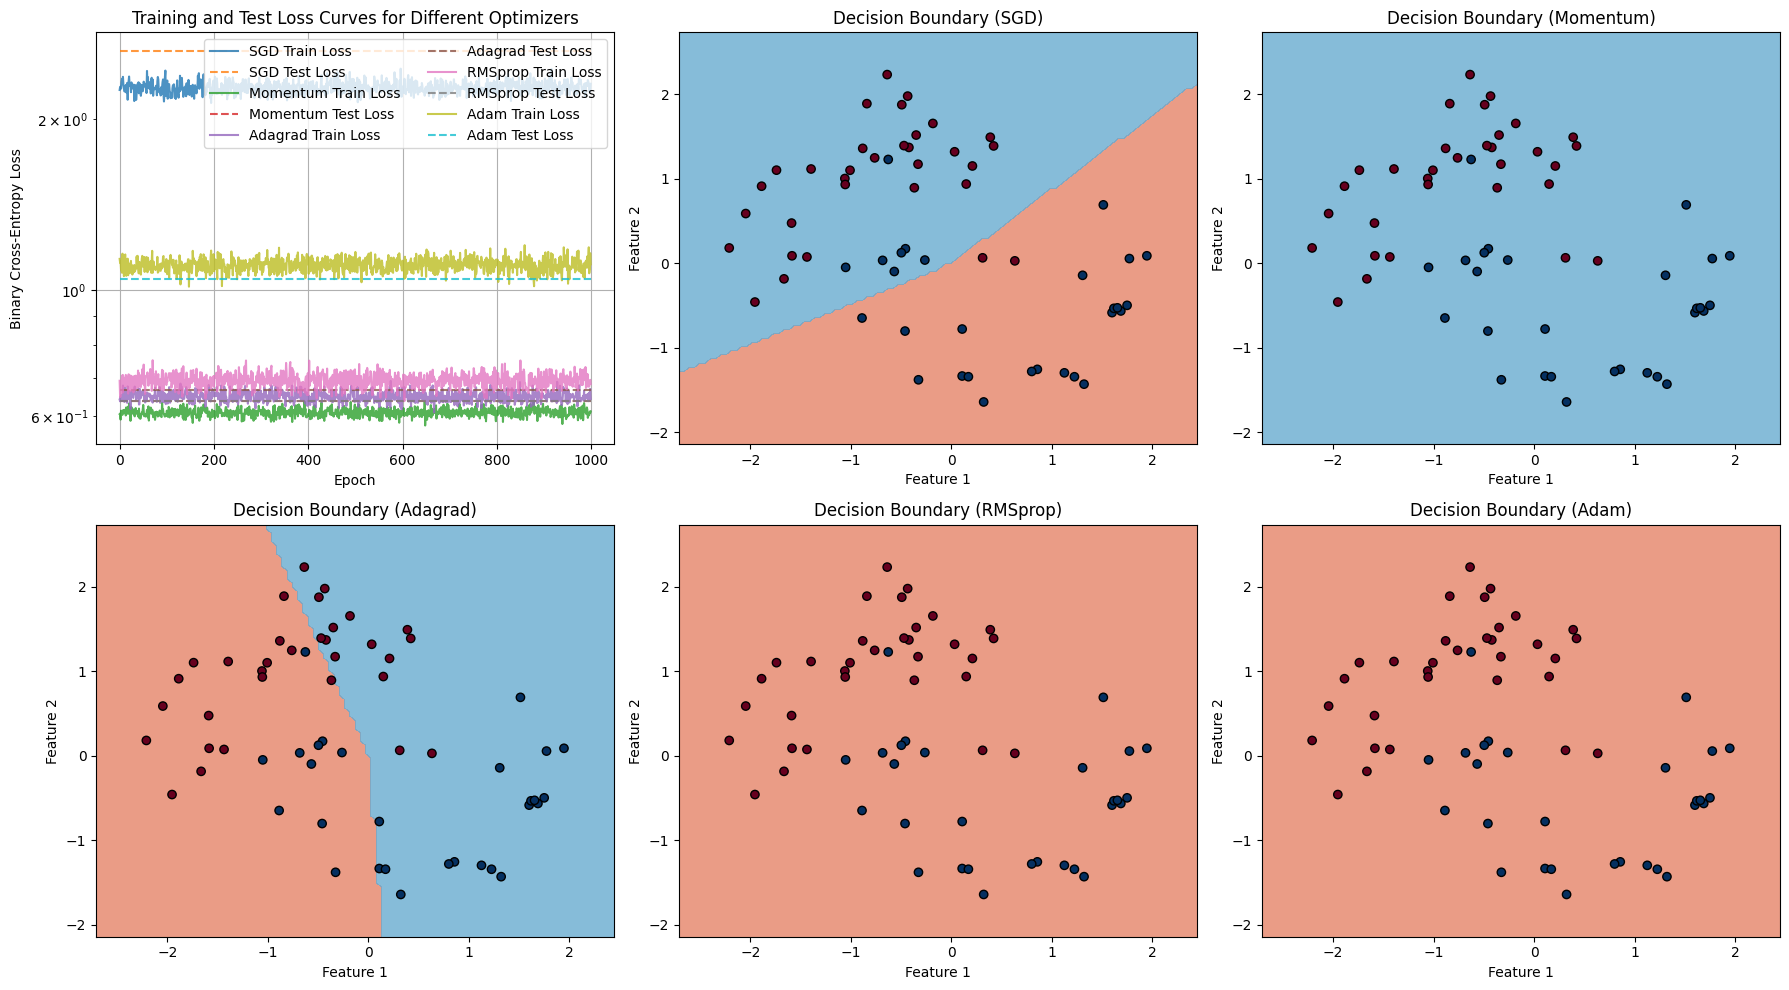

In [10]:
# --- 6. Plotting Decision Boundary ---
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).reshape(xx.shape) # Convert probabilities to class labels

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')


# --- Run Simulations for each Optimizer ---
results = {}
optimizers_to_test = {
    "SGD": lambda params: SGD(params, learning_rate=0.5), # Higher LR for plain SGD
    "Momentum": lambda params: SGDMomentum(params, learning_rate=0.1, momentum=0.9),
    "Adagrad": lambda params: Adagrad(params, learning_rate=0.5), # Adagrad often needs higher initial LR
    "RMSprop": lambda params: RMSprop(params, learning_rate=0.01, decay_rate=0.9),
    "Adam": lambda params: Adam(params, learning_rate=0.005, beta1=0.9, beta2=0.999) # Adam works well with slightly higher LR
}

epochs = 1000
hidden_neurons = 50

plt.figure(figsize=(18, 10))
loss_ax = plt.subplot(2, 3, 1) # First subplot for losses

for name, opt_constructor in optimizers_to_test.items():
    print(f"\n--- Training with {name} ---")
    model = SimpleNeuralNetwork(input_size=X_train_scaled.shape[1], hidden_size=hidden_neurons, output_size=1)
    optimizer = opt_constructor(model.get_params())

    train_losses, test_losses, final_model = train_and_evaluate(
        optimizer, model, X_train_scaled, y_train_reshaped, X_test_scaled, y_test_reshaped, epochs
    )
    results[name] = {'train_losses': train_losses, 'test_losses': test_losses, 'model': final_model}

    # Plot loss curves
    loss_ax.plot(train_losses, label=f'{name} Train Loss', alpha=0.8)
    loss_ax.plot(test_losses, label=f'{name} Test Loss', linestyle='--', alpha=0.8)

    # Plot decision boundary
    db_ax = plt.subplot(2, 3, len(results) + 1) # Start from 2nd subplot for DBs
    plot_decision_boundary(final_model, X_test_scaled, y_test_reshaped, f'Decision Boundary ({name})')


# Finalize Loss Plot
loss_ax.set_title('Training and Test Loss Curves for Different Optimizers')
loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Binary Cross-Entropy Loss')
loss_ax.legend(loc='upper right', ncol=2)
loss_ax.grid(True)
loss_ax.set_yscale('log') # Log scale for better visualization of convergence

plt.tight_layout()
plt.show()